# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `numpy` и `matplotlib`.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [3]:
N = X.shape[0]

In [4]:
X = np.hstack((np.ones((N,1)), X))

In [5]:
def regression(X, Y, alpha):
    theta = np.linalg.inv(X.T @ X + alpha * np.identity(X.shape[1])) @ X.T @ Y
    return theta

In [6]:
alphas = np.linspace(0, 10, num = 1000)

In [7]:
errors = [np.sqrt(np.sum(np.square(np.sum(regression(X, Y, alpha)*X, axis=1) - Y))/N) for alpha in alphas]

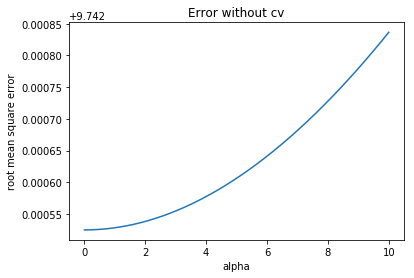

In [8]:
plt.xlabel('alpha')
plt.ylabel('root mean square error')
plt.title('Error without cv')
plt.plot(alphas, errors)
plt.show()

In [9]:
def best_alpha_cv(alphas, nfolds=5):
    min_error = float('inf')
    best_alpha = -1
    step = N // nfolds
    
    training = list()
    validation = list()
    
    for alpha in alphas:
        curr_train = list()
        curr_test = list()
        
        for fold in range(nfolds):
            test_start = step*fold
            test_end = step*(fold + 1)
            
            X_train = np.vstack((X[0:test_start,:], X[test_end:,:]))
            Y_train = np.concatenate((Y[0:test_start], Y[test_end:]))
            X_test = X[test_start:test_end,:]
            Y_test = Y[test_start:test_end]

            theta = regression(X_train, Y_train, alpha)
            
            Y_pred_test = np.sum(theta*X_test, axis=1)
            Y_pred_train = np.sum(theta*X_train, axis=1)
                
            curr_test.append(np.sqrt(np.sum(np.square(Y_pred_test - Y_test))/Y_test.shape[0]))
            curr_train.append(np.sqrt(np.sum(np.square(Y_pred_train - Y_train))/Y_train.shape[0]))
            
        training.append(np.mean(curr_train))
        validation.append(np.mean(curr_test))
        
        if np.mean(curr_test) < min_error:
            best_alpha = alpha
            min_error = np.mean(curr_test)
    return best_alpha, training, validation

In [10]:
alphas = np.linspace(0, 100, num = 10000)
alpha, training, validation = best_alpha_cv(alphas, 5)

In [11]:
alpha

5.830583058305831

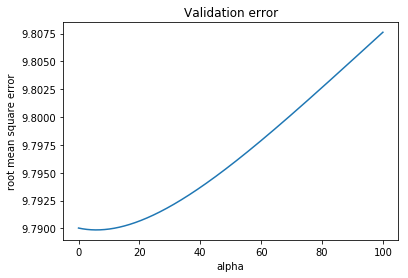

In [12]:
plt.xlabel('alpha')
plt.ylabel('root mean square error')
plt.title('Validation error')
plt.plot(alphas, validation)
plt.show()

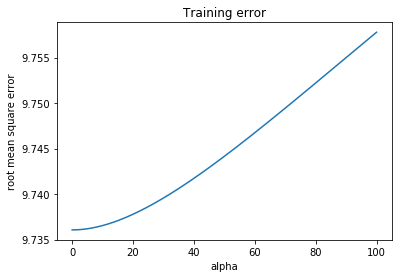

In [13]:
plt.xlabel('alpha')
plt.ylabel('root mean square error')
plt.title('Training error')
plt.plot(alphas, training)
plt.show()